In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("data/student.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [21]:
for i in df.columns:
    print('Printing column name:')
    print(i)
    print('\/\/\n')
    # print('Printing column type:')
    # print(df[i].dtype)
    print('Printing column unique values:')
    print(df[i].unique())
    print('============'*5)
    print('============'*5)
    # print('Printing column number of unique values:')
    # print(df[i].nunique())
    # print('Printing column missing values:')
    # print(df[i].isnull().sum())
 


Printing column name:
gender
\/\/

Printing column unique values:
['female' 'male']
Printing column name:
race/ethnicity
\/\/

Printing column unique values:
['group B' 'group C' 'group A' 'group D' 'group E']
Printing column name:
parental level of education
\/\/

Printing column unique values:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Printing column name:
lunch
\/\/

Printing column unique values:
['standard' 'free/reduced']
Printing column name:
test preparation course
\/\/

Printing column unique values:
['none' 'completed']
Printing column name:
math score
\/\/

Printing column unique values:
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23  

Adding columns for Total score and Average score

In [22]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.shape[0]

1000

In [24]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average score"] = df["total score"] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [33]:
reading_full = df[df["reading score"] == 100]["average score"].count()
writing_full = df[df["writing score"] == 100]["average score"].count()
math_full = df[df["math score"] == 100]["average score"].count()

print(f"Number of students with full marks in Math: {math_full}")
print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")


Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [34]:
math_less_20 = df[df["math score"] <= 100]["average score"].count()
print(math_less_20)

1000


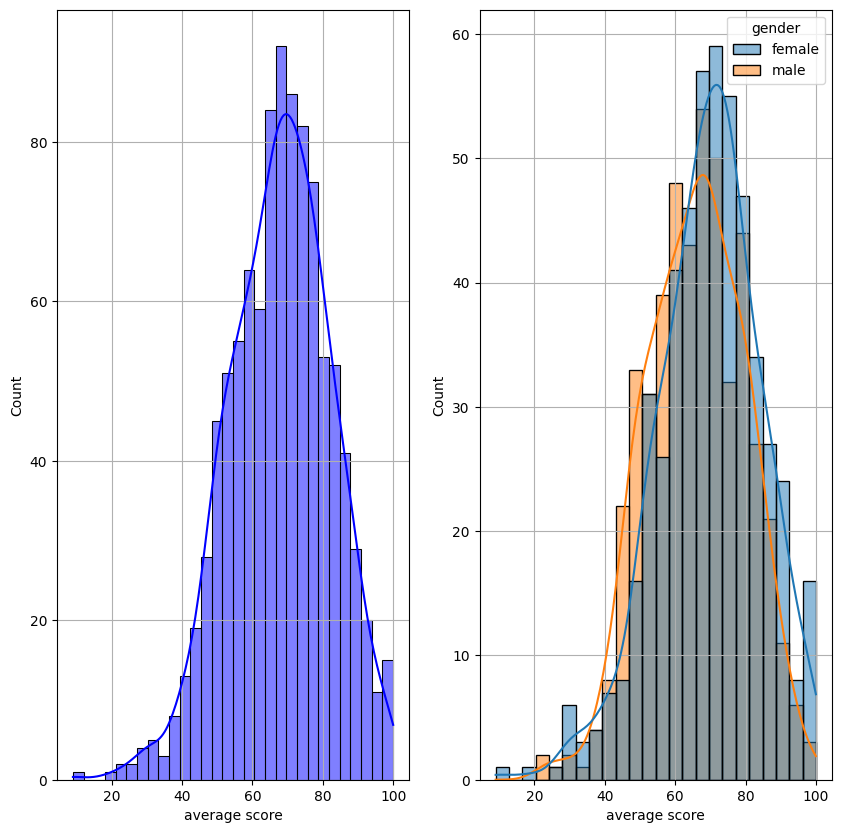

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
plt.subplot(121)
sns.histplot(data=df, x='average score',bins=30, kde=True, color='blue')
plt.grid(True)
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')
plt.grid(True)
plt.show()